<div class="alert alert-block alert-success">
    <h1 align="center">How to Handle Outliers</h1>
    <h3 align="center">PreProcessing before Training model</h3>
</div>

# Introduction

###  What are outliers?
*    Outliers are the values that look different from the other values in the data.
<img src = "outlier.png" width=50%>

### Reasons for outliers in data

*    Errors during data entry or a faulty measuring device (a faulty sensor may result in extreme readings).
*    Natural occurrence (salaries of junior level employees vs C-level employees)

### Problems caused by outliers

*    Outliers in the data may causes problems during model fitting (esp. linear models).
*    Outliers may inflate the error metrics which give higher weights to large errors (example, mean squared error, RMSE).


### Why do we need to Detect Outliers?

Outliers can impact the results of our analysis and statistical modeling in a drastic way. Check out the below image to visualize what happens to a model when outliers are present versus when they have been dealt with:

<img src = "01.png" width=50%>


* “Outliers are not necessarily a bad thing. These are just observations that are not following the same pattern as the other ones. But it can be the case that an outlier is very interesting. For example, if in a biological experiment, a rat is not dead whereas all others are, then it would be very interesting to understand why. This could lead to new scientific discoveries.  So, it is important to detect outliers.”

#  BoxPlot

Box plots are a visual method to identify outliers. Box plots is one of the many ways to visualize data distribution. Box plot plots the q1 (25th percentile), q2 (50th percentile or median) and q3 (75th percentile) of the data along with (q1–1.5*(q3-q1)) and (q3+1.5*(q3-q1)). Outliers, if any, are plotted as points above and below the plot.

<img src = "box.png">

# Inter Quartile Range (IQR)

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal. According to this procedure, we need to follow the following steps:

*    Find the first quartile, Q1.
*    Find the third quartile, Q3.
*    Calculate the IQR. IQR = Q3-Q1.
*    Define the normal data range with lower limit as Q1–1.5*IQR and upper limit as Q3+1.5*IQR.
*    Any data point outside this range is considered as outlier and should be removed for further analysis.

<img src = "1.png" width=50%>

#### In boxplot, this IQR method is implemented to detect any extreme data point where the maximum point (the end of high whisker) is Q3+1.5*IQR and the minimum point (the start of low whisker) is Q1–1.5*IQR.



#  Z-score 

<img src = "Z-score-formula.jpg" width=20%>


Z-score is just another form of standard deviation procedure. (**Assumption– The features are normally or approximately normally distributed.)**


– The data points which fall below mean-3*(sigma) or above mean+3*(sigma) are outliers.

where mean and sigma are the average value and standard deviation of a particular column.mean= 0.

<img src = "3.png" width=50%>


# Outlier detection in a nutshell

* For Normal distributions: Use empirical relations of Normal distribution.

– The data points which fall below mean-3*(svd) or above mean+3*(svd) are outliers.

* For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule.

– The data points which fall below (Q1 – 1.5 IQR) or above (Q3 + 1.5 IQR) are outliers.

* For Other distributions: Use percentile-based approach.

For Example, Data points that are far from 99% percentile and less than 1 percentile are considered an outlier.

<img src = "2.png" width=70%>


## Let's do this in code

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)
import seaborn as sns

from matplotlib.cbook import boxplot_stats
from matplotlib import cbook

In [3]:
df = pd.read_csv("weight-height.csv")
df.sample(5)

,Gender,Height,Weight
5323,Female,60.814927,110.141215
3293,Male,67.673859,185.099404
2176,Male,69.142273,175.832447
6676,Female,69.082759,163.632026
3212,Male,69.515640,189.425072


In [4]:
df.drop('Weight',axis=1,inplace=True)

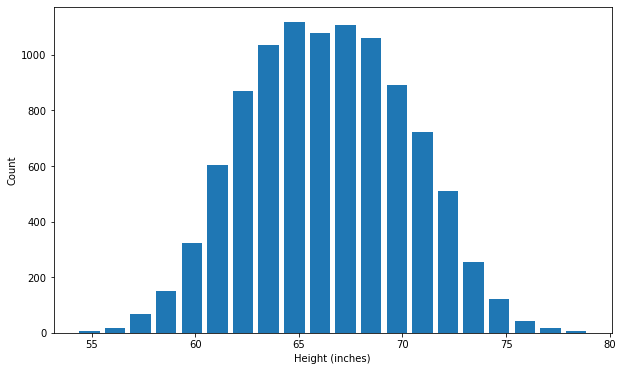

In [5]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

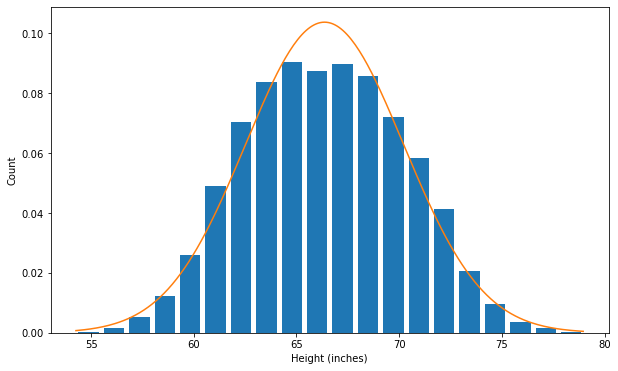

In [6]:
from scipy.stats import norm
import numpy as np
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Height.mean(),df.Height.std()))

## 1.Handling Outliers (BoxPlot)

<AxesSubplot:xlabel='Height'>

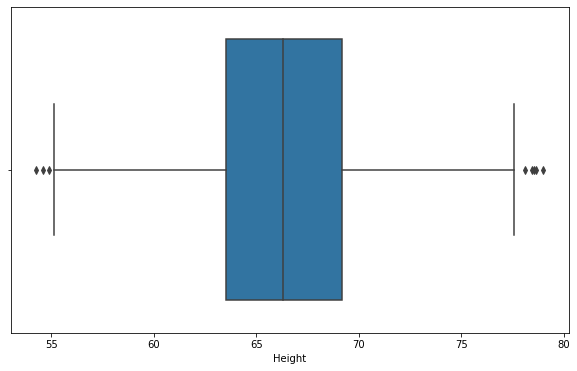

In [10]:
import seaborn as sns
sns.boxplot(x='Height',data=df)

<AxesSubplot:xlabel='Height'>

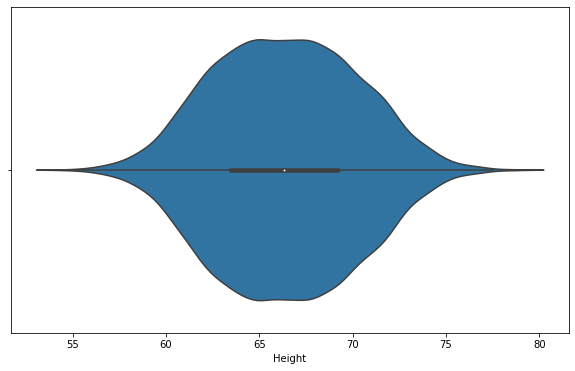

In [11]:
sns.violinplot(x='Height', data=df)


In [12]:
stat = boxplot_stats(df.Height)
stat

[{'mean': 66.36755975482124,
  'iqr': 5.668641245615746,
  'cilo': 66.22907241422848,
  'cihi': 66.40706774934083,
  'whishi': 77.5471863409053,
  'whislo': 55.1485573624105,
  'fliers': array([54.61685783, 54.87372753, 54.26313333, 78.09586747, 78.46205292,
         78.99874235, 78.52821043, 78.62137397]),
  'q1': 63.505620481218955,
  'med': 66.31807008178465,
  'q3': 69.1742617268347}]

## 2.Handling Outliers (IQR)

In [13]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1, Q3

(63.505620481218955, 69.1742617268347)

In [14]:
IQR = Q3 - Q1
IQR

5.668641245615746

In [15]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [16]:
df[(df.Height<lower_limit)|(df.Height>upper_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
7294,Female,54.873728
9285,Female,54.263133


**Now Remove Outliers**

In [17]:
df_no_outlier = df[(df.Height>lower_limit)&(df.Height<upper_limit)]
df_no_outlier

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [18]:
df_no_outlier.shape

(9992, 2)

In [19]:
df.shape

(10000, 2)

In [20]:
df.Height.mean()

66.36755975482106

In [21]:
df.Height.std()

3.847528120773233

In [22]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [23]:
min_thresold, max_thresold = df.Height.quantile([0.01,0.999])
min_thresold, max_thresold

(58.134411586716546, 77.06738853278372)

In [24]:
df[df.Height<min_thresold]

,Gender,Height
5026,Female,56.547975
5074,Female,56.159458
5122,Female,57.103869
5123,Female,56.445685
5162,Female,57.961936
...,...,...
9761,Female,56.975279
9825,Female,55.979198
9895,Female,57.740192
9904,Female,57.028857


In [25]:
df2 = df[(df.Height>min_thresold)&(df.Height<max_thresold)]
df2.shape

(9890, 2)

In [26]:
df2.sample(5)

,Gender,Height
635,Male,64.539040
2678,Male,71.301841
1877,Male,64.821156
9772,Female,63.845212
2587,Male,68.050026


In [27]:
df2.Height.describe()

count    9890.000000
mean       66.449292
std         3.735638
min        58.134496
25%        63.600234
50%        66.361012
75%        69.197407
max        77.067355
Name: Height, dtype: float64

## 3.Outlier detection and removal using 3 standard deviation

One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds.

*    Upper limit = mean + 3 * stdev

*    Lower limit = mean - 3 * stdev


In [28]:
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.91014411714076

In [29]:
lower_limit = df.Height.mean() -3*df.Height.std()
lower_limit

54.82497539250136

In [30]:
df[(df.Height>upper_limit) | (df.Height<lower_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers


**Now remove these outliers and generate new dataframe**

In [31]:
df_no_outlier_std_dev = df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df_no_outlier_std_dev.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [32]:
df_no_outlier_std_dev.shape

(9993, 2)

In [33]:
df.shape

(10000, 2)

**Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993)**

## 4.Outlier detection and removal using Z Score

In [34]:
df['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df.head(5)

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [35]:
(73.84-66.37)/3.84

1.9453124999999998

In [36]:
df[df['zscore']>3]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [37]:
df[df['zscore']<-3]

,Gender,Height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [38]:
df[(df.zscore<-3) | (df.zscore>3)]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


<h3 style='color:purple'>Remove the outliers and produce new dataframe</h3>

In [39]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [40]:
df_no_outliers.shape

(9993, 3)

In [41]:
df.shape

(10000, 3)

# 4. PyOD

PyOD has several advantages and comes with quite a few useful features. Here’s my pick of the bunch:

*    Open Source with detailed documentation and examples across various algorithms
*    Supports advanced models, including Neural Networks, Deep Learning, and Outlier Ensembles
*    Optimized performance with JIT (Just in Time) and parallelization using numba and joblib
*    Compatible with both Python 2 & 3

PyOD is a comprehensive Python toolkit to identify outlying objects in multivariate data with both unsupervised and supervised approaches.
The model covered in this example includes:

1.    Linear Models for Outlier Detection:

*    PCA: Principal Component Analysis use the sum of weighted projected distances to the eigenvector hyperplane as the outlier outlier scores) 
*    MCD: Minimum Covariance Determinant (use the mahalanobis distances as the outlier scores) 
*    OCSVM: One-Class Support Vector Machines
    

2.    Proximity-Based Outlier Detection Models:

*    LOF: Local Outlier Factor
*    CBLOF: Clustering-Based Local Outlier Factor
*    kNN: k Nearest Neighbors (use the distance to the kth nearest neighbor as the outlier score) 
*    Median kNN Outlier Detection (use the median distance to k nearest neighbors as the outlier score)
*    HBOS: Histogram-based Outlier Score
        

3.    Probabilistic Models for Outlier Detection:

* ABOD: Angle-Based Outlier Detection
        

4.    Outlier Ensembles and Combination Frameworks

*    Isolation Forest
*    Feature Bagging
*    LSCP


# **Some Common type of Outlier Algorithms:**


# 1.   Angle-Based Outlier Detection (ABOD):

It considers the relationship between each point and its neighbor(s). It does not consider the relationships among these neighbors. The variance of its weighted cosine scores to all neighbors could be viewed as the outlying score
ABOD performs well on multi-dimensional data
PyOD provides two different versions of ABOD:

1.Fast ABOD: Uses k-nearest neighbors to approximate

2.Original ABOD: Considers all training points with high-time complexity

# 2.   k-Nearest Neighbors Detector:

For any data point, the distance to its kth nearest neighbor could be viewed as the outlying score
PyOD supports three kNN detectors:

**Largest:** Uses the distance of the kth neighbor as the outlier score

**Mean:** Uses the average of all k neighbors as the outlier score

**Median:** Uses the median of the distance to k neighbors as the outlier score
# 3.   Isolation Forest:
It uses the scikit-learn library internally. In this method, data partitioning is done using a set of trees. Isolation Forest provides an anomaly score looking at how isolated the point is in the structure. The anomaly score is then used to identify outliers from normal observations
Isolation Forest performs well on multi-dimensional data

# 4.   Histogram-based Outlier Detection:
It is an efficient unsupervised method which assumes the feature independence and calculates the outlier score by building histograms
It is much faster than multivariate approaches, but at the cost of less precision

# 5.   Local Correlation Integral (LOCI):

LOCI is very effective for detecting outliers and groups of outliers. It provides a LOCI plot for each point which summarizes a lot of the information about the data in the area around the point, determining clusters, micro-clusters, their diameters, and their inter-cluster distances.

None of the existing outlier-detection methods can match this feature because they output only a single number for each point

# 6.   Feature Bagging:

A feature bagging detector fits a number of base detectors on various sub-samples of the dataset. It uses averaging or other combination methods to improve the prediction accuracy
By default, Local Outlier Factor (LOF) is used as the base estimator. However, any estimator could be used as the base estimator, such as kNN and ABOD
Feature bagging first constructs n sub-samples by randomly selecting a subset of features. This brings out the diversity of base estimators. Finally, the prediction score is generated by averaging or taking the maximum of all base detectors

# 7.   Clustering Based Local Outlier Factor:

It classifies the data into small clusters and large clusters. The anomaly score is then calculated based on the size of the cluster the point belongs to, as well as the distance to the nearest large cluster



## Let's write some code

In [42]:
!pip install pyod

     |████████████████████████████████| 160 kB 414 kB/s eta 0:00:01    |██████▏                         | 30 kB 861 kB/s eta 0:00:01
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190271 sha256=b2f65ce790b451bb48c6eb2e9bf945b19837e12738e7984fa49d4ea9a98c4618
  Stored in directory: /home/jovyan/.cache/pip/wheels/83/f7/7e/10c1ce875d81fa1c820845561570df5b5a8b134a4b2b2eb009
Successfully built pyod


In [43]:
# !pip install combo
from __future__ import division
from __future__ import print_function

import os
import sys
from time import time

from numpy import percentile
import matplotlib.font_manager

# Import all models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA

In [44]:
# Define the number of inliers and outliers
num_samples = 500
out_frac = 0.30
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
x, y = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
num_inliers = int((1. - out_frac) * num_samples)
num_outliers = int(out_frac * num_samples)
ground_truth = np.zeros(num_samples, dtype=int)
ground_truth[-num_outliers:] = 1

In [45]:
# Show the statics of the data
print('No. of inliers: %i' % num_inliers)
print('No. of outliers: %i' % num_outliers)
print('Ground truth arrayy shape is {shape}. Outlier and inliers are represented by 1 and 0 respectively.\n'.format(shape=ground_truth.shape))
print(ground_truth)

No. of inliers: 350
No. of outliers: 150
Ground truth arrayy shape is (500,). Outlier and inliers are represented by 1 and 0 respectively.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [46]:
rs = np.random.RandomState(42)
# Define outlier detection tools to be compared
clf = {
    'Angle-based Outlier Detector (ABOD)':
        ABOD(contamination=out_frac),
    'Cluster-based Local Outlier Factor (CBLOF)':
        CBLOF(contamination=out_frac,
              check_estimator=False, random_state=rs),
    'Isolation Forest': IForest(contamination=out_frac,
                                random_state=rs),
    'K Nearest Neighbors (KNN)': KNN(
        contamination=out_frac),
    'Average KNN': KNN(method='mean',
                       contamination=out_frac),
    'Local Outlier Factor (LOF)':
        LOF(n_neighbors=35, contamination=out_frac),
    'One-class SVM (OCSVM)': OCSVM(contamination=out_frac),
    'Principal Component Analysis (PCA)': PCA(
        contamination=out_frac, random_state=rs),
    
}

In [47]:
# Show all detectors
for i, classifier in enumerate(clf.keys()):
    print('Model', i + 1, classifier)

Model 1 Angle-based Outlier Detector (ABOD)
Model 2 Cluster-based Local Outlier Factor (CBLOF)
Model 3 Isolation Forest
Model 4 K Nearest Neighbors (KNN)
Model 5 Average KNN
Model 6 Local Outlier Factor (LOF)
Model 7 One-class SVM (OCSVM)
Model 8 Principal Component Analysis (PCA)


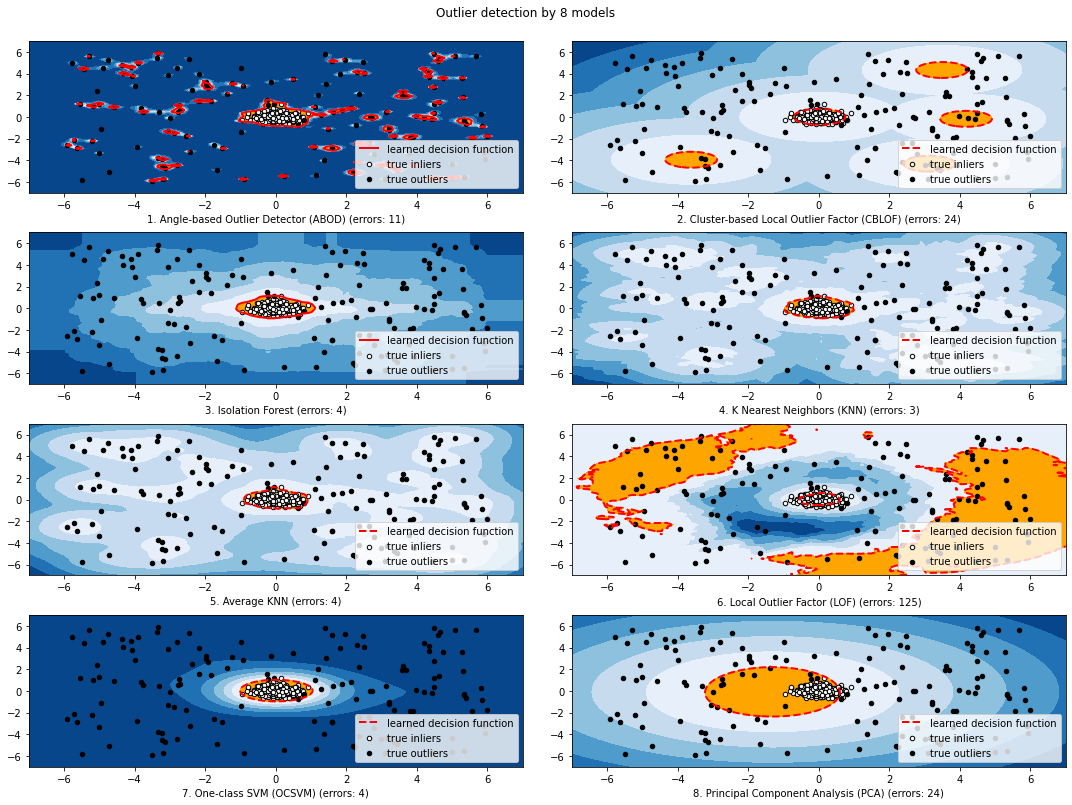

In [48]:
# Fit the models with the generated data and 
# compare model performances
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(num_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(num_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(num_outliers, 2))]

    # Fit the model
    plt.figure(figsize=(15, 12))
    for i, (classifier_name, classifier) in enumerate(clf.items()):
        #print(i + 1, 'fitting', classifier_name)
        # fit the data and tag outliers
        classifier.fit(X)
        scores_pred = classifier.decision_function(X) * -1
        y_pred = classifier.predict(X)
        threshold = percentile(scores_pred, 100 * out_frac)
        num_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points

        Z = classifier.decision_function(np.c_[x.ravel(), y.ravel()]) * -1
        Z = Z.reshape(x.shape)
        subplot = plt.subplot(4, 2, i + 1)
        subplot.contourf(x, y, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        a = subplot.contour(x, y, Z, levels=[threshold],
                            linewidths=2, colors='red')
        subplot.contourf(x, y, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-num_outliers, 0], X[:-num_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-num_outliers:, 0], X[-num_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [a.collections[0], b, c],
            ['learned decision function', 'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, classifier_name, num_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 1.00, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection by 8 models")
plt.show()

# 7. References

- [Dealing with outliers using the Z-Score method](https://towardsdatascience.com/outlier-detection-methods-in-machine-learning-1c8b7cca6cb8)
- [An Awesome Tutorial to Learn Outlier Detection in Python using PyOD Library](https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/)
- [PYOD Documentation](https://pyod.readthedocs.io/en/latest/example.html)

# 8. Project

experiment with PYOD and also other types of models like linear regression, random forest and gradient boosting!